<a href="https://colab.research.google.com/github/Emmaculate2020/WK9-IP-KNN-Naive-Bayes-Classifier/blob/master/WK9_Python_Programming_K_Nearest_Neighbours_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming: K-Nearest Neighbours (KNN)

## 1. Defining the Question

### a) Specifying the Data Analytic Question
> Analysis of the Titanic Dataset using the K-Nearest Neighbours Model.

### b) Defining the Metric for Success
> We are going to predict whether a passenger would survive or not given different independent features as provided in the dataset.
> The accuracy should be above 90% because this will help in the improvement of certain features in order to increase the survivability of passengers in case of an accident.

### c) Understanding the context 
> We are required to predict whether a passenger will survive or not given different features.

### d) Recording the Experimental Design
>1. Reading the data
>2. Checking the data
>3. Tidying the data
>4. Exploratory Analysis
>5. Implementing the solution
>6. Challenging the solution
>7. Follow up questions

### e) Data Relevance
> The data provided is relevant for our analysis.

## 2. Reading the Data

In [1]:
# Importing the necessary libraries
#

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Loading the Data from the source 
# 
data = pd.read_csv("training.csv")
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




## 3. Checking the Data

In [5]:
# Determining the no. of records in our dataset
#
data.shape

(891, 12)

In [6]:
# Previewing the top of our dataset
#
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Previewing the bottom of our dataset
# 
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# Checking whether each column has an appropriate datatype
#

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# We are first goinng to drop the columns we won't need for our analysis:
# In this case: passenger's name, passenger's id and ticket number

data = data.drop(['Name','PassengerId','Ticket'], axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
# replacing na values in cabin with nan before label encoding
data["Cabin"].fillna( method ='bfill', inplace = True) 
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,C85,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,C123,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,E46,S
5,0,3,male,NaN,0,0,8.4583,E46,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,G6,S
8,1,3,female,27.0,0,2,11.1333,G6,S
9,1,2,female,14.0,1,0,30.0708,G6,C


In [11]:
data["Cabin"].fillna( method ='ffill', inplace = True) 
data['Cabin'].unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

In [12]:
# We use label encorder to convert the oject data to numerical for the cabin column
#

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data['Cabin'] = lb_make.fit_transform(data['Cabin'])

In [13]:
# We again deal with the null values here before converting the values of the Embarked column from string to numerical
# 

data["Embarked"].fillna( method ='bfill', inplace = True) 
data.head(10)

# There are no more nan values in this column

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,81,S
1,1,1,female,38.0,1,0,71.2833,81,C
2,1,3,female,26.0,0,0,7.9250,55,S
3,1,1,female,35.0,1,0,53.1000,55,S
4,0,3,male,35.0,0,0,8.0500,129,S
5,0,3,male,NaN,0,0,8.4583,129,Q
6,0,1,male,54.0,0,0,51.8625,129,S
7,0,3,male,2.0,3,1,21.0750,145,S
8,1,3,female,27.0,0,2,11.1333,145,S
9,1,2,female,14.0,1,0,30.0708,145,C


In [14]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [15]:
# We now going to replace different values of column Embarked and Sex with code numbers for easy analysis
#

data['Sex'] = data['Sex'].map({'female': 1, 'male': 0})
#data['Embarked'] = data['Sex'].map({"S" : 0, "C": 1, "Q": 2})

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,81,S
1,1,1,1,38.0,1,0,71.2833,81,C
2,1,3,1,26.0,0,0,7.9250,55,S
3,1,1,1,35.0,1,0,53.1000,55,S
4,0,3,0,35.0,0,0,8.0500,129,S


In [16]:
# We use label encorder to convert the oject data to numerical for the embarked column
#

lb_make = LabelEncoder()
data['Embarked'] = lb_make.fit_transform(data['Embarked'])

In [17]:
data['Embarked'].value_counts()

# 2 = S, 0 = C, 1 = Q

2    645
0    169
1     77
Name: Embarked, dtype: int64

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

In [18]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


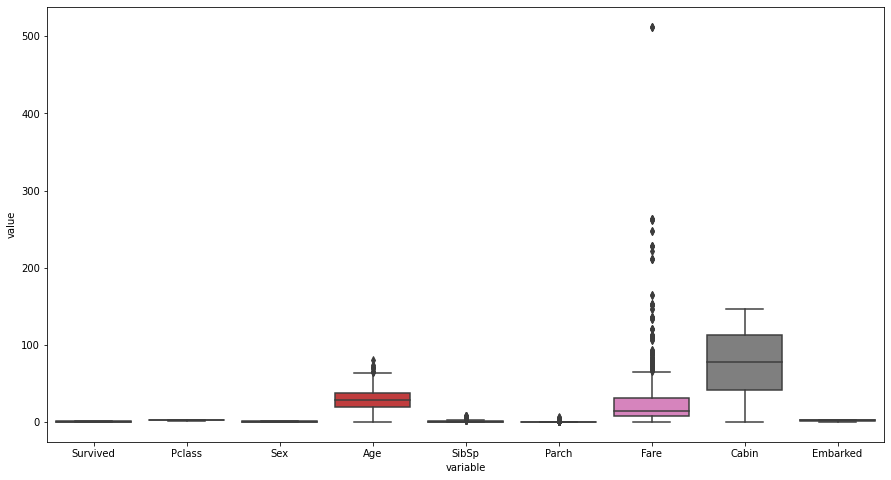

In [19]:
# Checking for Outliers
#

import matplotlib.pyplot as plt
import seaborn as sns

df = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked']]

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

In [20]:
# Checking for Anomalies
# Using Z score
#
columns = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked']]

from scipy import stats
z = np.abs(stats.zscore(columns))
print(z)

[[0.78927234 0.82737724 0.73769513 ... 0.50244517 0.09901939 0.58766427]
 [1.2669898  1.56610693 1.35557354 ... 0.78684529 0.09901939 1.93575193]
 [1.2669898  0.82737724 1.35557354 ... 0.48885426 0.52078151 0.58766427]
 ...
 [0.78927234 0.82737724 1.35557354 ... 0.17626324 0.40158903 0.58766427]
 [1.2669898  1.56610693 0.73769513 ... 0.04438104 0.40158903 1.93575193]
 [0.78927234 0.82737724 0.73769513 ... 0.49237783 0.40158903 0.67404383]]


In [21]:
# Dropping and Confirming that our outliers have been dropped from the dataset.
#
new_df= columns[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {columns.shape[0]}")
print(f"New dataframe size: {new_df.shape[0]}")

# This means that all our data fall within the 3rd stands=ard deviation on a normal curve which is okay for our analysis.

Previous dataframe size : 891
New dataframe size: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# Identifying the Missing Data
#
data.isnull().sum()

# Age has 177 null values

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
dtype: int64

In [23]:
# Dealing with the Missing Data
# We are going to replace the null values with the mean of the values of that colunm

data['Age'].fillna(data['Age'].mean(), inplace=True) 

data.isnull().sum()

# We don't have null values anymore.

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

## 6. Exploratory Analysis

In [25]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

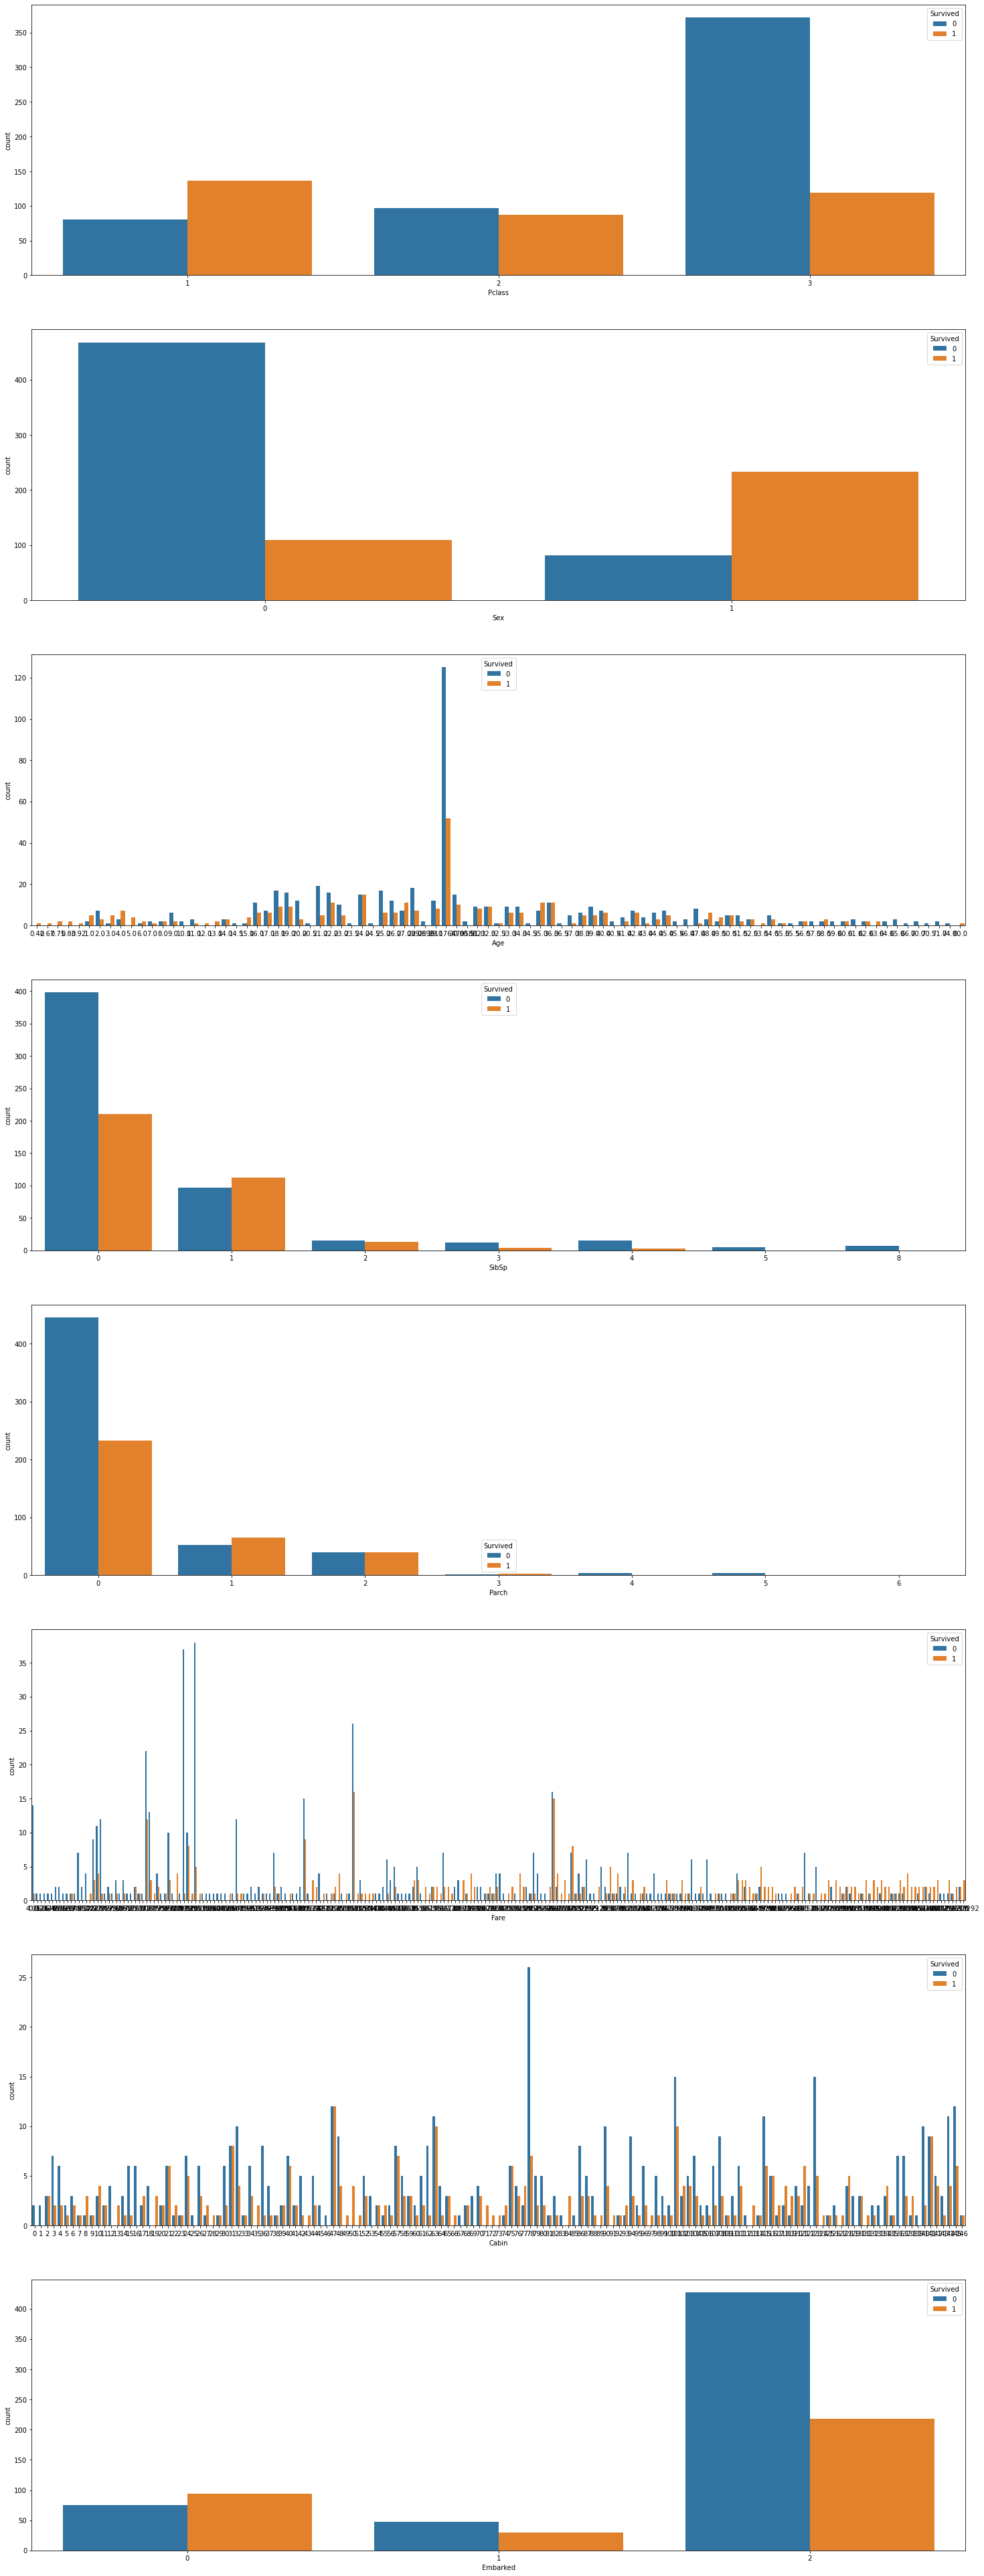

In [27]:
# Ploting the bivariate summaries and recording our observations
#
f, axes = plt.subplots(8, 1, figsize=[25, 70])

sns.countplot('Pclass', hue= 'Survived', data=data, ax=axes[0])
sns.countplot('Sex', hue= 'Survived', data=data, ax=axes[1])
sns.countplot('Age', hue= 'Survived', data=data, ax=axes[2])
sns.countplot('SibSp', hue= 'Survived', data=data, ax=axes[3])
sns.countplot('Parch', hue= 'Survived', data=data, ax=axes[4])
sns.countplot('Fare', hue= 'Survived', data=data, ax=axes[5])
sns.countplot('Cabin', hue= 'Survived', data=data, ax=axes[6])
sns.countplot('Embarked', hue= 'Survived', data=data, ax=axes[7])

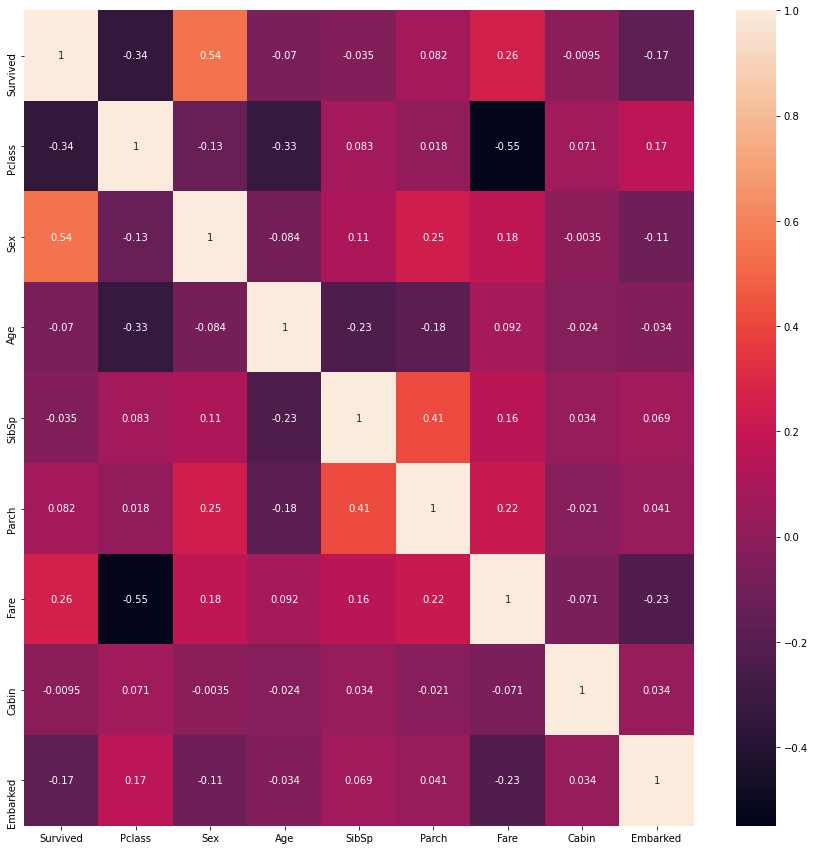

In [28]:

# We are going to plot a correlation matrix using a heatmap
#

plt.figure(figsize = (15,15))

sns.heatmap(data.corr(), annot = True)

plt.show()

### Observations
> - Survival has a strong positive correlation to sex of the passengers.
> - Survival has a weak negative correlation to cabin.

In [29]:
# Data Reduction
# Checking for multicollinearity on the independent variables only
#
independent = data.drop('Survived', 1)
correlations = independent.corr()
correlations

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Pclass,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.071250,0.166223
Sex,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,-0.003457,-0.111894
Age,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.023807,-0.033737
SibSp,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,0.034050,0.069444
Parch,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.020581,0.041064
Fare,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,-0.070926,-0.227015
Cabin,0.071250,-0.003457,-0.023807,0.034050,-0.020581,-0.070926,1.000000,0.033831
Embarked,0.166223,-0.111894,-0.033737,0.069444,0.041064,-0.227015,0.033831,1.000000


In [30]:
# Calculating the variance inflation factor(VIF) which is the inverse of the correlations
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

# The VIF for the independent columns are below 5 which is okay, the collinearity of the variables is good for analysis.

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Pclass,1.673361,0.136315,0.426604,-0.144689,-0.121140,0.895391,-0.041686,-0.028806
Sex,0.136315,1.109989,0.100913,-0.010883,-0.243960,-0.060063,-0.015856,0.102622
Age,0.426604,0.100913,1.205256,0.187479,0.095883,0.049291,-0.001433,-0.024676
SibSp,-0.144689,-0.010883,0.187479,1.284858,-0.441866,-0.228825,-0.051222,-0.092136
Parch,-0.121140,-0.243960,0.095883,-0.441866,1.324136,-0.264199,0.036636,-0.088832
Fare,0.895391,-0.060063,0.049291,-0.228825,-0.264199,1.651411,0.048325,0.246107
Cabin,-0.041686,-0.015856,-0.001433,-0.051222,0.036636,0.048325,1.009349,-0.016017
Embarked,-0.028806,0.102622,-0.024676,-0.092136,-0.088832,0.246107,-0.016017,1.081896


## 7. Implementing the Solution

In [31]:
# Implementing the Solution
# Splitting our dataset into its attributes and labels
#

X = data.drop("Survived", 1).values
y = data['Survived'].values

In [32]:
# Splitting our data into training and test sets
# 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [33]:
# Feature Scaling
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Performing dimensionality reduction using LDA
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [35]:
#building and fitting our mode
#
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors':[2,3,4,5,6,7,8,9,13,11]}
knn = KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 11}

In [36]:
# Making predictions using our model
#
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [37]:
#Creating a comparison df

comp_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
comp_df.head(10)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,0
6,1,1
7,1,1
8,1,0
9,1,1


In [38]:
# Summary statistics of the comparison df
# 
comp_df.describe()

,Actual,Predicted
count,179.000000,179.000000
mean,0.385475,0.301676
std,0.488073,0.460273
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [39]:
# Evaluating the error performance of the model

from sklearn import metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.20670391061452514
Mean Squared Error: 0.20670391061452514
Root Mean Squared Error: 0.454647017602145


In [40]:
# Evaluating the model performance
#
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

# From our analysis, 0 is for survived and 1 for did not survive.
# Out of the 110 passengers who survived 11 are predicted to have not survived.
# Out of the 69 who did not survived 26 are predicted to have survived.
# Our model is 79% accurate if we apply dimensionality reduction.

[[99 11]
 [26 43]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       110
           1       0.80      0.62      0.70        69

    accuracy                           0.79       179
   macro avg       0.79      0.76      0.77       179
weighted avg       0.79      0.79      0.79       179



### When we do not apply Dimensionality reduction

In [41]:
# Splitting our dataset into its attributes and labels
#

X = data.drop("Survived", 1).values
y = data['Survived'].values

In [42]:
# Splitting our data into training and test sets
# 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [43]:
# Feature Scaling
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
#building and fitting our mode
#

params = {'n_neighbors':[2,3,4,5,6,7,8,9,13,11]}
knn = KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 9}

In [45]:
# Making predictions using our model
#
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [46]:
# Evaluating the error performance of the model

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.18435754189944134
Mean Squared Error: 0.18435754189944134
Root Mean Squared Error: 0.42936877145344576


In [47]:
# Evaluating the model performance
#
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

# Out of the 110 passengers who survived 11 are predicted to have not survived.
# Out of the 69 who did not survived 22 are predicted to have survived.
# Our model is 82% accurate if we do not apply dimensionality reduction.

[[99 11]
 [22 47]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



## 8. Challenging the solution

In [48]:
# Reviewing the Solution 
#

## 9. Follow up questions

### a). Did we have the right data?
> Yes

### b). Do we need other data to answer our question?
> No

### c). Did we have the right question?
> Yes